Módulo 2. Data Analysis with Python

Alumno: Enrique Ricardo García Hernández

Matrícula: A01315428

Fecha: 15 Oct 2022

In [62]:
#Limpieza de las bases de datos "crudas" antes de iniciar los análisis
#1.- Identificación y manejo de missing values
#2.- Formateo de datos (unidaes, formatos, convenciones)
#3.- Normalización de datos (unificación de los rangos)
#4.- Generación de binning datos
#5.- COnversión de datos categóricos a numéricos, para su modelación

In [63]:
#Tratamiento de missing values
#Checar que la base de datos tenga missing values
#1.- ELiminar la variable que presentan missing value
#2.- ELiminar los registros que presentan missing value

#Remplazar los valores missing con:
#1.- remplazar por el promedio (variables cuantitativas)
#2.- reemplazar con el valor más común (variebles cualitativas)

#Dejar el missing value como missing value

In [64]:
import pandas as pd
import numpy as np
ruta="https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
df=pd.read_csv(ruta,header=None)
#Actualizar los nombres de las columnas
headers=['symboling','normalized-losses','make','fuel-type','aspiration','num_of_doors','body-style','drive-wheels','engine-location','wheel-base','length','width','height',
         'curb-weight','engine-type','num_of-cylinder','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']
df.columns=headers
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num_of_doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [65]:
df.shape
df['normalized-losses'] = pd.to_numeric(df['normalized-losses'], errors='coerce')
copia=df.copy() #Generación de backup

In [66]:
#Como eliminar missing values
#En la función dropna se debe especificar axis=0 ==> Elimina la fila entera, axis=1 ==>Elimina la columa entera
copia.dropna(subset=['price'],axis=0) #NO Remplaza el data frame
copia.dropna(subset=['price'],axis=0,inplace=True) #Remplaza el data frame

In [67]:
#Remplazar valores faltantes usando nuevos valores
mean=copia['normalized-losses'].mean()
mean

122.0

In [68]:
copia['normalized-losses'].replace(np.nan,mean) #Cambia los missing values por el valor de la media que calculamos antes

0      122.0
1      122.0
2      122.0
3      164.0
4      164.0
       ...  
200     95.0
201     95.0
202     95.0
203     95.0
204     95.0
Name: normalized-losses, Length: 205, dtype: float64

In [69]:
#Dándole formato a los datos
#Poner todo en el mismo tipo de unidades comparables
copia.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num_of_doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num_of-cylinder       object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [70]:
#Cambiando de galones por milla a Litros por cada 100 km
copia['city-mpg']=235/copia['city-mpg'] #<== se hizo la conversión
copia.rename(columns={'city-mpg':'city-L/100 km'},inplace=True) #<== Renombramos la variable y la reemplazamos

In [71]:
#Cambio de formatos de objects a floats
copia['price'] = pd.to_numeric(copia['price'], errors='coerce') #cambiamos de string a numérica y los variables "extraños" los dejamos como NaN

In [73]:
#Normalización de datos
copia['length'].describe()

count    205.000000
mean     174.049268
std       12.337289
min      141.100000
25%      166.300000
50%      173.200000
75%      183.100000
max      208.100000
Name: length, dtype: float64

In [74]:
copia['height'].describe()

count    205.000000
mean      53.724878
std        2.443522
min       47.800000
25%       52.000000
50%       54.100000
75%       55.500000
max       59.800000
Name: height, dtype: float64

In [ ]:
#Técnicas de escalamiento:
#1.- Simple scaling: xold / xmax
#2.- Min-Max: (xold - xmin)/(xmax - xmin)
#3.- Standard score o z-score: (xold-mean)/desv est

In [77]:
#Técnica simple scaling
copia['length_ss']=copia['length']/copia['length'].max()

#Técnica Min-Max
copia['length_min_max']=(copia['length']-copia['length'].min())/(copia['length'].max()-copia['length'].min())

#Técnica z-score
copia['length_zscore']=(copia['length']-copia['length'].mean()/copia['length'].std())

In [88]:
copia['length_ss'].describe() #Estadísticos simple scaling

count    205.000000
mean       0.836373
std        0.059285
min        0.678039
25%        0.799135
50%        0.832292
75%        0.879865
max        1.000000
Name: length_ss, dtype: float64

In [89]:
copia['length_min_max'].describe() #Estadísticos Min-Max

count    205.000000
mean       0.491780
std        0.184139
min        0.000000
25%        0.376119
50%        0.479104
75%        0.626866
max        1.000000
Name: length_min_max, dtype: float64

In [90]:
copia['length_zscore'].describe() #Estadísticos Z_Score

count    205.000000
mean     159.941690
std       12.337289
min      126.992421
25%      152.192421
50%      159.092421
75%      168.992421
max      193.992421
Name: length_zscore, dtype: float64

In [111]:
copia[['length_ss','length_min_max','length_zscore']].describe() #Estadísticos de las 3 transformaciones

,length_ss,length_min_max,length_zscore
count,205.000000,205.000000,205.000000
mean,0.836373,0.491780,159.941690
std,0.059285,0.184139,12.337289
min,0.678039,0.000000,126.992421
25%,0.799135,0.376119,152.192421
50%,0.832292,0.479104,159.092421
75%,0.879865,0.626866,168.992421
max,1.000000,1.000000,193.992421


In [113]:
#Haciendo binning (información agrupada, categorizar la información)
bins=np.linspace(min(copia['price']),max(copia['price']),4) #Dividimos el umbral de la varible precio en 4 espacios del mismo tamaño
group_names=["1.-Low","2.- Medium","3.-High"]
copia['rango_precio']=pd.cut(copia['price'],bins,labels=group_names,include_lowest=True)
copia[['price','rango_precio']].head(20)

,price,rango_precio
0,13495.0,1.-Low
1,16500.0,1.-Low
2,16500.0,1.-Low
3,13950.0,1.-Low
4,17450.0,1.-Low
5,15250.0,1.-Low
6,17710.0,1.-Low
7,18920.0,2.- Medium
8,23875.0,2.- Medium
9,NaN,NaN


In [114]:
#Ver el número de observaciones por cada bin
copia["rango_precio"].value_counts()

1.-Low        171
2.- Medium     18
3.-High        12
Name: rango_precio, dtype: int64

<BarContainer object of 3 artists>

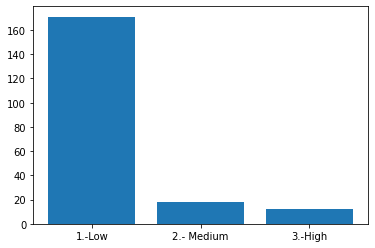

In [115]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, copia["rango_precio"].value_counts())

In [ ]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, copia["rango"].value_counts())

In [110]:
#Convertir variables categóricas a numéricas
#Uso del One-hot encoding
#Generación de variables dummy con Pandas
pd.get_dummies(copia['fuel-type']) 

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
200,0,1
201,0,1
202,0,1
203,1,0


**Laboratorio módulo 2 completo**
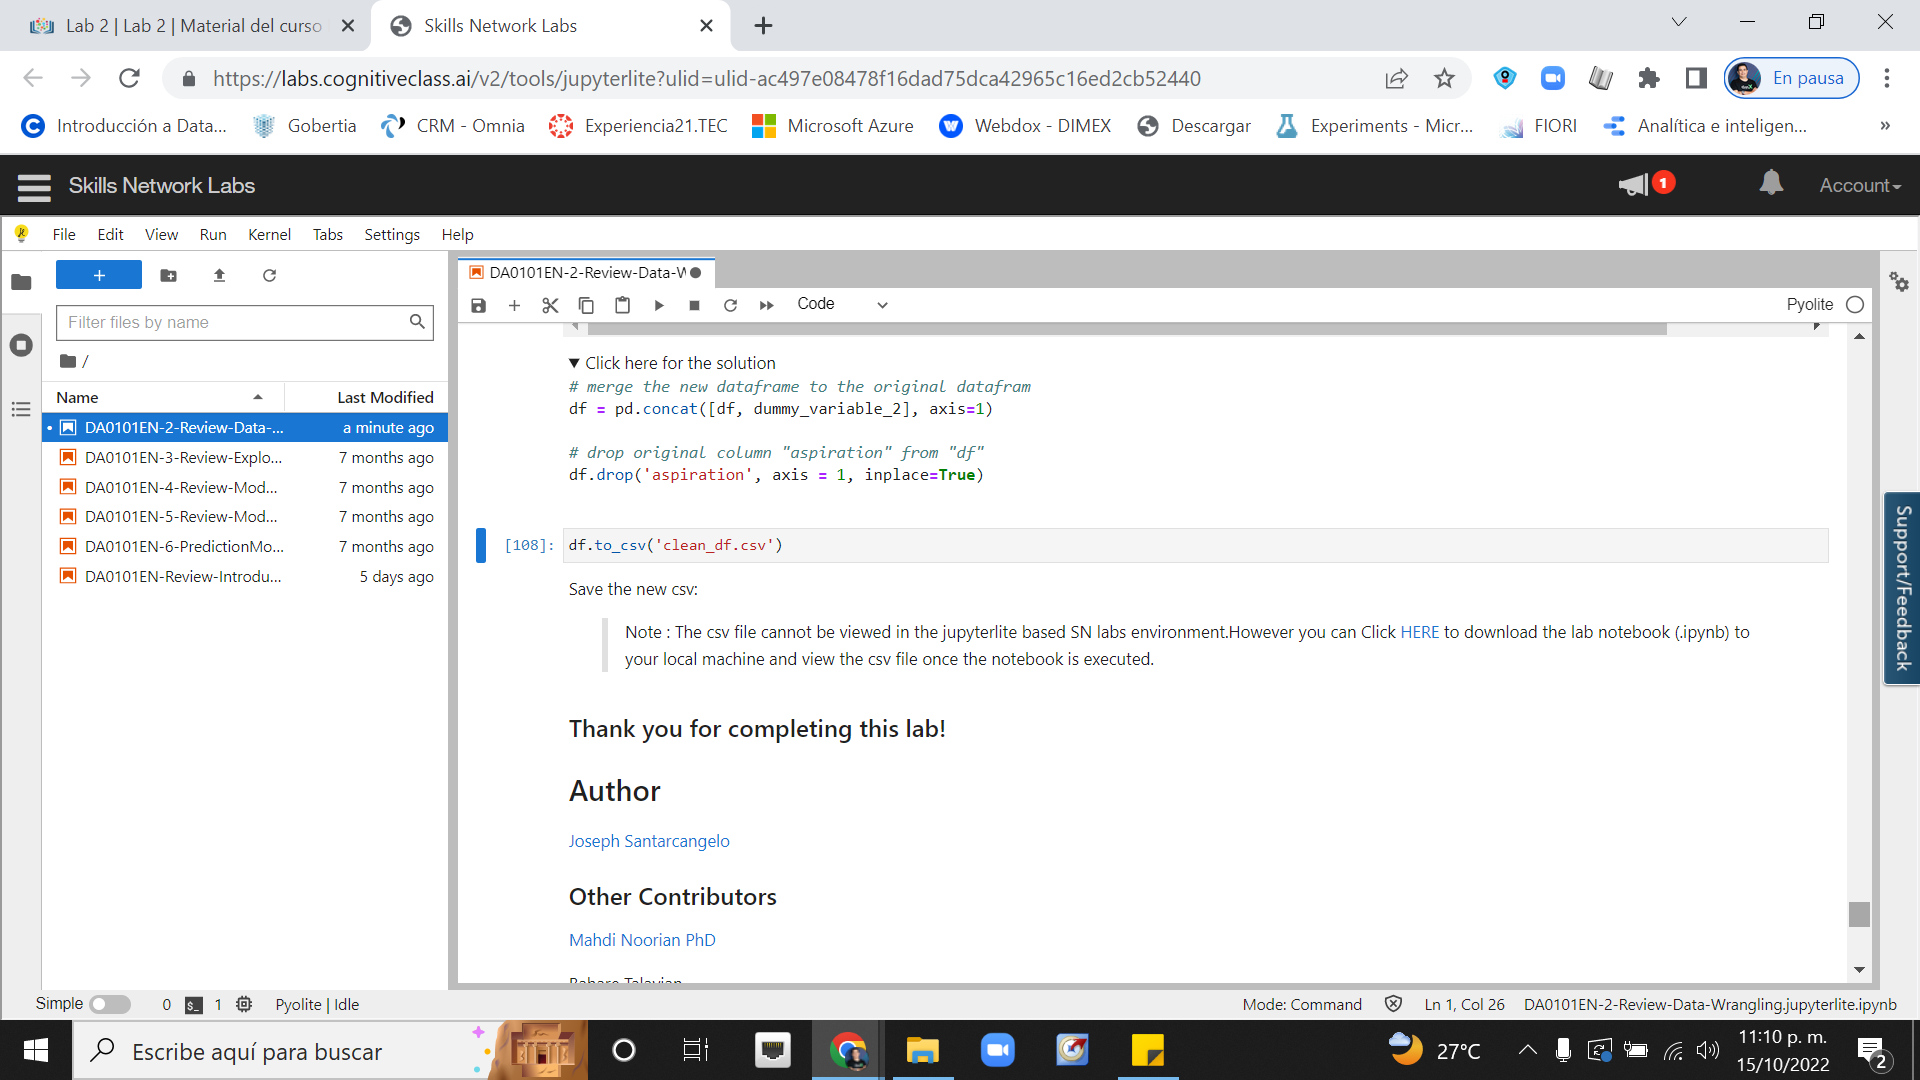

**Graded review module 2**
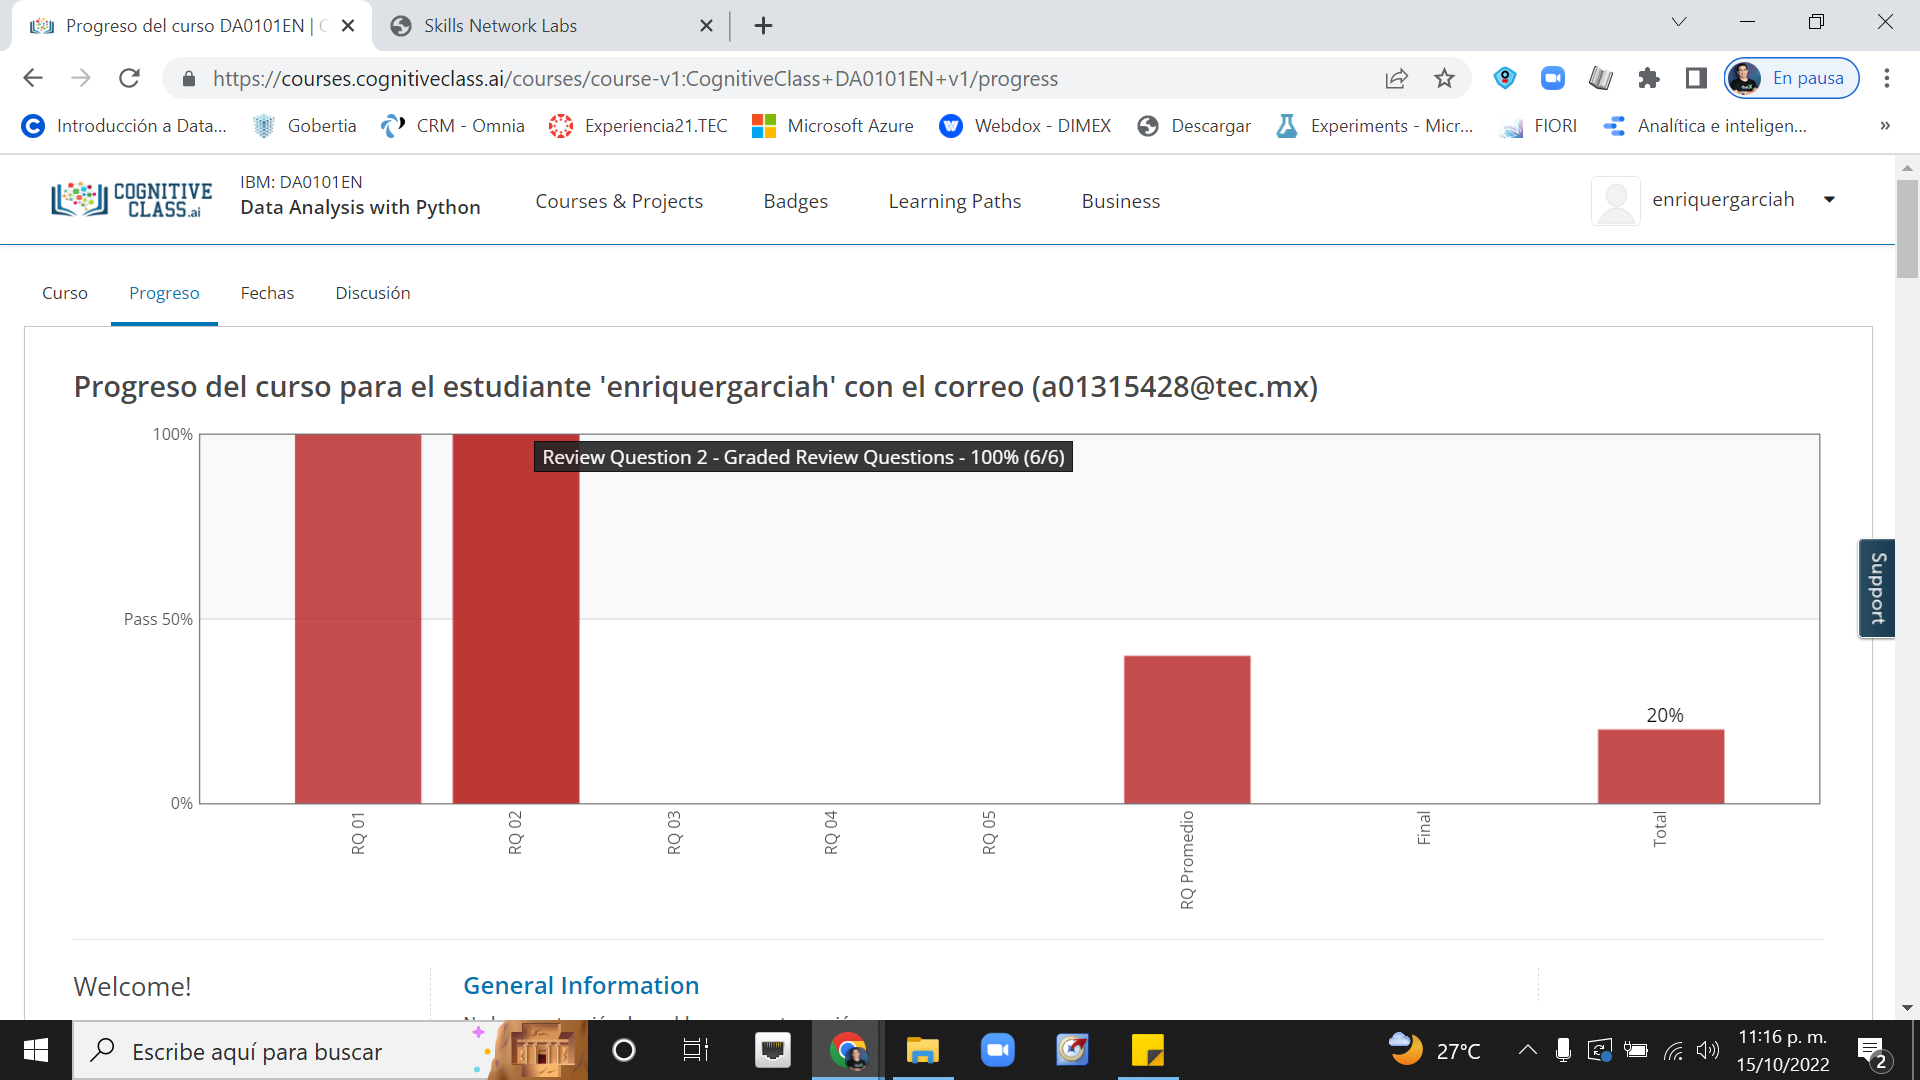